## Defining graph measures

In [14]:
from Rat_fingerprint_measure import *
measures_names = [
                'Density',
                'Efficiency of the LCC', #LCC : Largest connected component
                '# of connected components',
                '# of communities',
                'Fraction of nodes in the LCC',
                'Connected components entropy',
                'Fraction of nodes in the center in the LCC',
                'Fraction of nodes in the periphery in the LCC',
                'Fraction of nodes in the barycenter in the LCC',
                'Transitivity',
                'Average clustering coefficient',
                'Average square clustering',  
                'Modularity',
                'Mean Assortativity coefficient of the LCC',
                'Mean shortest path length of the LCC',
                'Average eccentricity of the LCC',
                'Node average degree',
                'Average communicability of the LCC',
                'Average node similarity of the LCC',
                'Average node betweenness centrality',
                'Average edge betweenness centrality']



nb_measures = len(measures_names)
nb_measures

21

### Defining the RGB codes

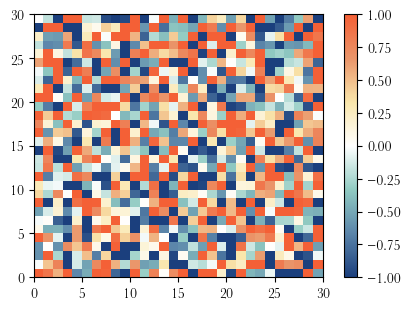

In [2]:
def plot_examples(colormaps):
    """
    Helper function to plot data with associated colormap.
    """
    np.random.seed(19680801)
    data = np.random.randn(30, 30)
    n = len(colormaps)
    fig, axs = plt.subplots(1, n, figsize=(n * 2 + 2, 3),
                            layout='constrained', squeeze=False)
    for [ax, cmap] in zip(axs.flat, colormaps):
        psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=-1, vmax=1)
        fig.colorbar(psm, ax=ax)
    plt.show()

rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Baskerville']
rgb_codes = [(27,63,125),
             (145, 203, 194),
            (249, 230, 171),
            (234, 149, 106)]

# Convert RGB codes to color strings
colors = ['#%02x%02x%02x' % rgb for rgb in rgb_codes]

# Print the list of colors
#print(colors)
colors_ =["#1b3f7d","#5B85AA", "#91cbc2","white", "#f9e6ab", "#ea956a","#F46036"] #add white as zero point
cmap = LinearSegmentedColormap.from_list("mycmap", colors_)
cmap_r = cmap.reversed()
plot_examples([cmap])
# Set the default color cycle
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["white","#1b3f7d","#5B85AA", "#91cbc2","#f9e6ab", "#ea956a","#F46036"]) 

## Basic example: random graph

In [3]:
N = 100
adj = np.random.rand(N,N)
adj = (adj>0.9).astype('double')
adj = normalize_adjacency(adj, method = 'max')

fp = fingerprint_measures(adj)

print('Measures of fingerprint as a dictionary:\n')
print(fp)
print('\nMeasures of fingerprint as an array:\n')
print(dict_to_vec(fp))

Measures of fingerprint as a dictionary:

{'Density': 0.1892929292929293, 'Efficiency': 0.5888215488215469, '# of connected components': 1, '# of communities': 99, 'Fraction of nodes in the largest connected component': 1.0, 'Connected components entropy': 0, 'Fraction of nodes in the center': 0.14, 'Fraction of nodes in the periphery': 0.86, 'Fraction of nodes in the barycenter': 0.01, 'Transitivity': 0.1895917294550552, 'Average clustering coefficient': 0.19004425891923885, 'Average square clustering': 0.10564876305509437, 'Modularity': 0.1667832235534512, 'Assortativity coefficient analysis': -0.06019931829001419, 'Shortest path length analysis': 0.0186021834506683, 'Average eccentricity': array([0.03030303]), 'Average degree': 18.74, 'Average communicability': array([0.00738421]), 'Average node similarity': array([0.18181818]), 'Average node betweenness centrality': 0.008587920016491444, 'Average edge betweenness centrality': 0.0019654388064206615}

Measures of fingerprint as an ar

### Load all numpy arrays and perfom graph measures

In [4]:
cwd = os.getcwd()
files = os.listdir(cwd + '/adj_mat/')

In [5]:
data_directory = "/Users/behnaz/NCADD/paper_pipeline_v1/graph_measures/adj_mat/"
graph_measures = np.empty((0,nb_measures))
all_npy_files = []
graph_names =[]
ids = []
for file in os.listdir(data_directory):
    if file.startswith("pre"):
        if file.endswith(".npy"):
            all_npy_files.append(file)
            
all_names = sorted(all_npy_files, key = lambda x: (str(x[5:10])))
N=0
#all_names
for file in all_names:
    name = os.path.splitext(file)[0]
    #print(name,N)
    graph_names.append(name)
    
    # Extract the ID from the graph name and append it to the IDs list
    value = name.split('_')[1]
    ids.append(int(value[0:2]))
    
    adj = np.load('adj_mat/'+ file)
    Adj = np.array(adj>0).astype('float')
    Adj = normalize_adjacency(Adj, method = 'max')
    results = dict_to_vec(fingerprint_measures(Adj))
    graph_measures = np.vstack((graph_measures, np.real(results)))
    N=N+1
#print(ids)
#print(len(ids))

In [6]:
measures = np.nan_to_num(graph_measures)

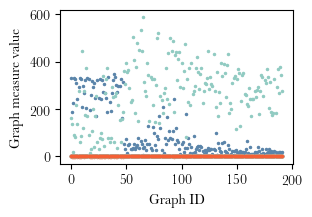

In [7]:
# visualising graph measures values
plt.figure(figsize=(3,2))
plt.plot(measures,'.', markersize=3)
plt.ylabel('Graph measure value')
plt.xlabel('Graph ID')
plt.savefig('unNormalized_graph_measure.svg')
plt.show()

In [8]:

# Create a DataFrame with the data and column names
df = pd.DataFrame(data=measures, columns=measures_names,index=graph_names)

# Save the DataFrame to a CSV file
df.to_csv('Non_Normal_graph_fingerprint.csv')

In [9]:
# normalizing values between 0-1
min_value = 0
max_value = 1
# Assuming measures.T is a 2D array with shape (19, 192)
scaler = MinMaxScaler(feature_range=(min_value, max_value))

# Fit the scaler on your data and transform it
normalized_measures = scaler.fit_transform(measures)

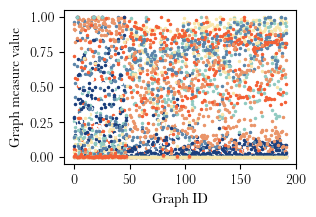

In [10]:
plt.figure(figsize=(3,2))
plt.plot(normalized_measures,'.', markersize=3)
plt.ylabel('Graph measure value')
plt.xlabel('Graph ID')
plt.savefig('Normalized_graph_measure.svg')
plt.show()

In [11]:

# Create a DataFrame with the data and column names
df = pd.DataFrame(data=normalized_measures, columns=measures_names,index=graph_names)

# Save the DataFrame to a CSV file
df.to_csv('Normal_graph_fingerprint.csv')

### Pearson correlation of graphs measures and cluster map

In [15]:
# Pearson correlation
corr = np.corrcoef(normalized_measures.T)

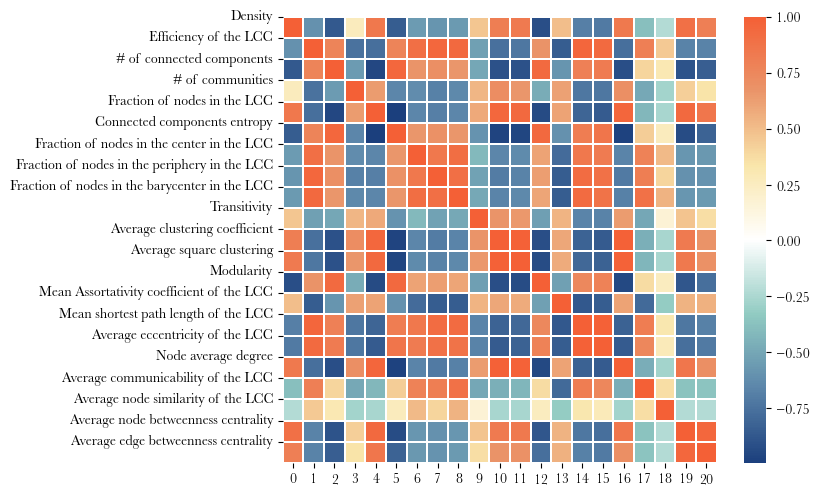

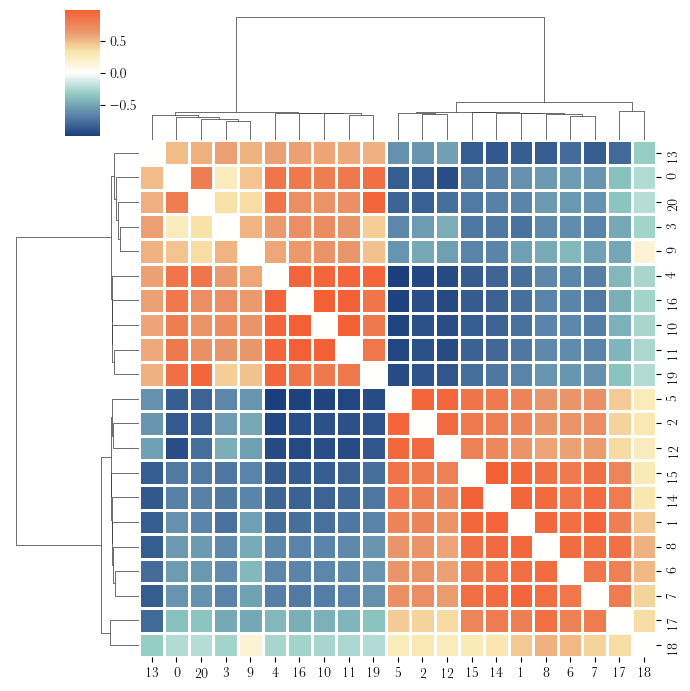

In [16]:

fig, ax = plt.subplots(figsize=(7, 5.8))

g = sns.heatmap(corr, cmap=cmap,linewidths=0.01)

plt.yticks(np.arange(len(measures_names)), measures_names, rotation=0)
#plt.savefig('Pearson_Correlation.svg')
plt.show()

# Create a clustermap
g = sns.clustermap(corr-np.eye(len(corr)),metric='euclidean', cmap=cmap,square=False,linewidths=0.9, figsize=(7, 7),
                   cbar_pos=(0.1, 0.8, 0.05, 0.18),colors_ratio=0.03, row_cluster=True, col_cluster=True)

#plt.savefig('clustermap_corr.svg')
plt.show()


### UMAP embeding

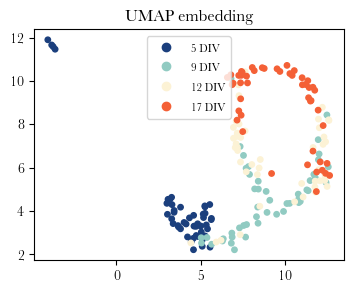

In [19]:
plt.figure(figsize=(4, 3))
fit = umap.UMAP(n_neighbors=6, min_dist=0.7, n_components=4,)
u = fit.fit_transform(normalized_measures)
umap1 = u[:, 0] # first UMAP axis
umap2 = u[:, 1] # second UMAP axis
scatter =plt.scatter(u[:,0], u[:,1], c = np.array(ids), s=15.0,  cmap = cmap)
plt.title('UMAP embedding')

# Create a legend with unique numerical values
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in colors]
unique_ids = np.unique(ids)
legend_labels = [f'{id} DIV' for id in unique_ids]

# Extract handles from scatter.legend_elements()
handles, _ = scatter.legend_elements()
legend = plt.legend(handles=handles, labels=legend_labels, loc='upper center')

# Customize the legend title and labels
plt.setp(legend.get_title(), fontsize=14)
for text in legend.get_texts():
    text.set_fontsize(8)
#plt.savefig('UMAPEmbeding.svg')
plt.show()

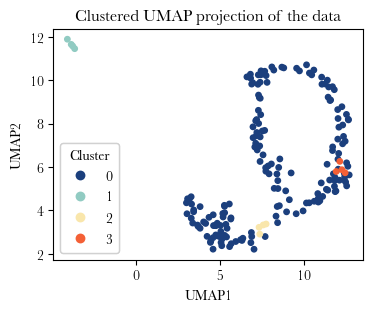

In [20]:
db =DBSCAN(eps=0.56, min_samples=4).fit(u)
labels = db.labels_
_labels = np.copy(labels)

fig, ax = plt.subplots(figsize=(4,3))
scatter = plt.scatter(umap1, umap2, s=15.0,c=_labels+1, cmap=cmap)
plt.title('Clustered UMAP projection of the data')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Cluster")
ax.add_artist(legend1)
#plt.savefig('umap_behavioral_data.pdf')
plt.show()

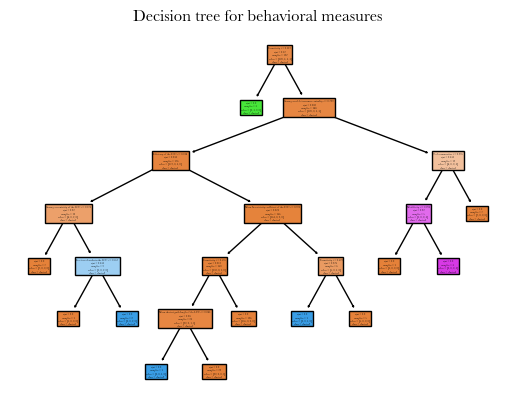

Importance of Efficiency of the LCC = 0.02897280822896347
Correlation of Efficiency of the LCC with UMAP1 = -0.746224917398976
Correlation of Efficiency of the LCC with UMAP2 = -0.14743067381141803
Importance of # of communities = 0.1623188405797102
Correlation of # of communities with UMAP1 = 0.3686203678004466
Correlation of # of communities with UMAP2 = 0.2027193611831361
Importance of Fraction of nodes in the LCC = 0.05797101449275363
Correlation of Fraction of nodes in the LCC with UMAP1 = 0.7816665385940513
Correlation of Fraction of nodes in the LCC with UMAP2 = 0.6109499676727081
Importance of Transitivity = 0.40209296947270995
Correlation of Transitivity with UMAP1 = 0.520155042848383
Correlation of Transitivity with UMAP2 = 0.1948547129299038
Importance of Modularity = 0.06956521739130435
Correlation of Modularity with UMAP1 = -0.70445800781444
Correlation of Modularity with UMAP2 = -0.7173388809512292
Importance of Mean Assortativity coefficient of the LCC = 0.01294089401082

In [21]:
clf = tree.DecisionTreeClassifier(random_state=25)
clf = clf.fit(normalized_measures, labels)
tree.plot_tree(clf, filled=True, feature_names=measures_names, class_names = ['cluster1', 'cluster2', 'cluster3','cluster4'])
plt.title("Decision tree for behavioral measures")
#plt.savefig('behavioral_decision_tree.pdf')
plt.show()

decision_features = []
decision_features_ID = []
importances = clf.feature_importances_
for i in range(len(importances)):
    if importances[i]>0:
            decision_features.append(measures_names[i])
            decision_features_ID.append(i)
            print('Importance of '+ measures_names[i] + ' = '+str(importances[i]))
            print('Correlation of '+ measures_names[i] + ' with UMAP1 = '
                      +str(np.corrcoef(normalized_measures[:, i], umap1)[0,1]))
            print('Correlation of '+ measures_names[i] + ' with UMAP2 = '
                      +str(np.corrcoef(normalized_measures[:, i], umap2)[0,1]))            

In [22]:
decision_features 

['Efficiency of the LCC',
 '# of communities',
 'Fraction of nodes in the LCC',
 'Transitivity',
 'Modularity',
 'Mean Assortativity coefficient of the LCC',
 'Mean shortest path length of the LCC',
 'Average eccentricity of the LCC',
 'Average node betweenness centrality']

In [23]:
decision_features_ID

[1, 3, 4, 9, 12, 13, 14, 15, 19]

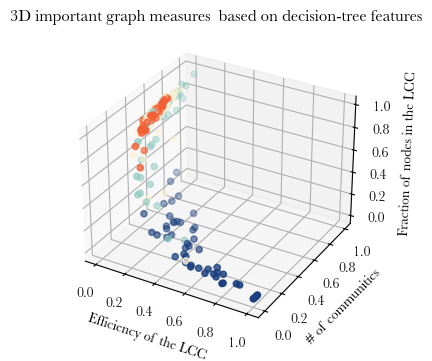

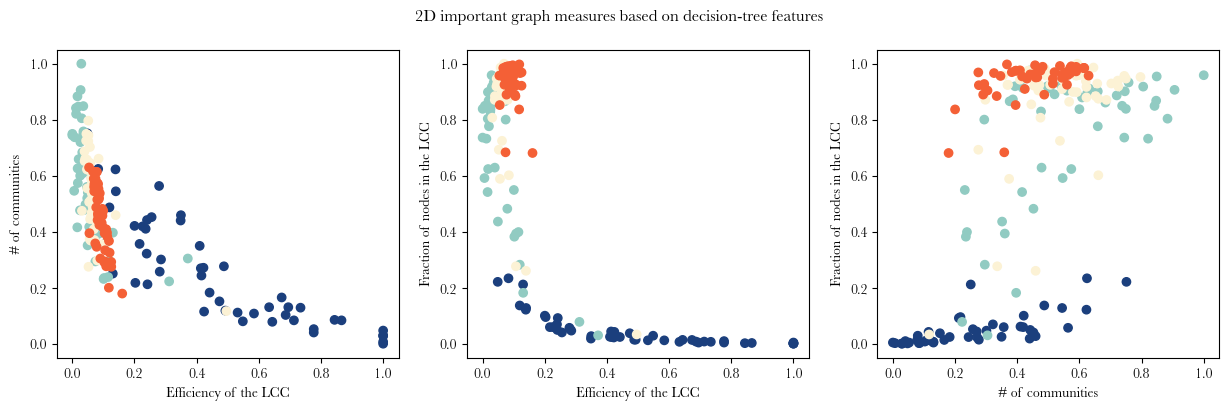

In [36]:
# Select the columns in data matrix associated to decision features
measure_1 = normalized_measures[:,decision_features_ID[0]]
measure_2 = normalized_measures[:,decision_features_ID[1]]
measure_3 = normalized_measures[:,decision_features_ID[2]]


fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(projection='3d')
ax.scatter(measure_1, measure_2, measure_3, c= ids, cmap=cmap)
ax.set_xlabel(decision_features[0])
ax.set_ylabel(decision_features[1])
ax.set_zlabel(decision_features[2])
ax.set_title('3D important graph measures  based on decision-tree features')
plt.show()


fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharex=True,
                                    figsize=(15, 4))


ax0.scatter(measure_1, measure_2, c= ids, cmap=cmap)
ax0.set_xlabel(decision_features[0])
ax0.set_ylabel(decision_features[1])

ax1.scatter(measure_1, measure_3, c= ids, cmap=cmap)
ax1.set_xlabel(decision_features[0])
ax1.set_ylabel(decision_features[2])

ax2.scatter(measure_2, measure_3, c= ids, cmap=cmap)
ax2.set_xlabel(decision_features[1])
ax2.set_ylabel(decision_features[2])

fig.suptitle('2D important graph measures based on decision-tree features')
plt.show()

### PCA analysis

PCA variance ratio: [0.80875328 0.08404248 0.04091641 0.01883294]


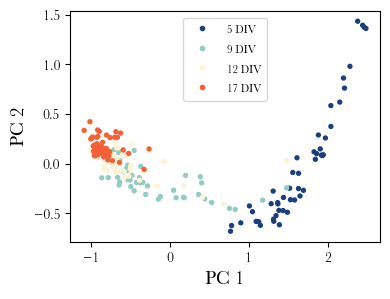

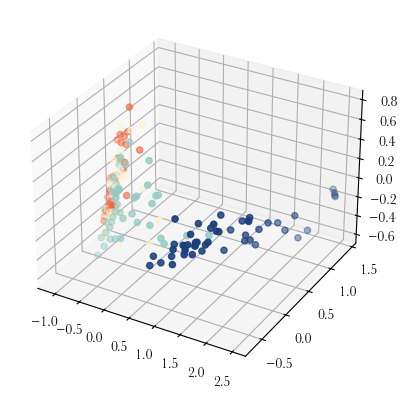

<Figure size 400x300 with 0 Axes>

In [27]:


pca = PCA(n_components=4)
pca.fit((normalized_measures))

print('PCA variance ratio:',pca.explained_variance_ratio_)

plt.figure(figsize=(4, 3))
X_pca = pca.transform(normalized_measures)
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=ids,marker='o', s=8, alpha=1,cmap=cmap)


# Create a legend with unique numerical values
legend_elements = [Line2D([0], [0], marker='.', color='w', markerfacecolor=color, markersize=1) for color in colors]
unique_ids = np.unique(ids)
legend_labels = [f'{id} DIV' for id in unique_ids]

# Extract handles from scatter.legend_elements()
handles, _ = scatter.legend_elements()
legend = plt.legend(handles=handles, labels=legend_labels,  markerscale=0.5,loc='upper center')

# Customize the legend title and labels
plt.setp(legend.get_title(), fontsize=10)
for text in legend.get_texts():
    text.set_fontsize(8)

# Set labels for the axes
plt.xlabel("PC 1", fontsize=14)
plt.ylabel("PC 2", fontsize=14)

# Save the plot
#plt.savefig('PCA.svg')
plt.show()

fig = plt.figure()
plt.figure(figsize=(4, 3))
ax = fig.add_subplot(projection='3d')
ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], c=ids,s=20,cmap=cmap)
plt.show()

#the variance of each components

### Most important measures for the first 7 components

Fraction of nodes in the LCC id 4: 1.0
Efficiency of the LCC id 1: 0.9908408684427793
Fraction of nodes in the periphery in the LCC id 7: 0.970441511197804
Average node betweenness centrality id 19: 0.9261666092983378
Connected components entropy id 5: 0.9091965365453387
Modularity id 12: 0.907957690827495
Average communicability of the LCC id 17: 0.8777636140727426
Mean Assortativity coefficient of the LCC id 13: 0.8220238814708098
Fraction of nodes in the barycenter in the LCC id 8: 0.8180268730632972
# of connected components id 2: 0.8156100010816751
Mean shortest path length of the LCC id 14: 0.8123657908427131
Average eccentricity of the LCC id 15: 0.7745475227020502
Density id 0: 0.7439771573376237
# of communities id 3: 0.7345475434993659
Average square clustering id 11: 0.728049486859743
Average edge betweenness centrality id 20: 0.6786455132955757
Node average degree id 16: 0.6531814340688611
Average clustering coefficient id 10: 0.6396144063303745
Fraction of nodes in the cen

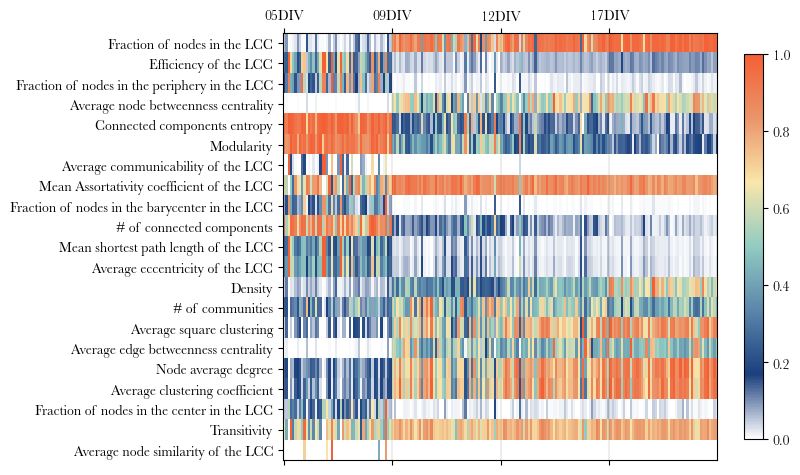

In [28]:
cumulative_contribution = np.sum(np.abs((pca.components_[0:2,:])), axis=0) #normalize and check the expression it
cumulative_contribution= cumulative_contribution/np.max(cumulative_contribution)
important_measures_id = np.argsort(cumulative_contribution)[::-1]
for measure_id in important_measures_id:
    print(measures_names[measure_id]+' id '+str(measure_id)+': ' +str(cumulative_contribution[measure_id]))
    
colors1 = ["white","#1b3f7d","#5B85AA", "#91cbc2","#f9e6ab", "#ea956a","#F46036"]
cmap1 = LinearSegmentedColormap.from_list("mycmap", colors1)
cmap_r1 = cmap.reversed()


# Rearrange rows of the measures matrix based on important_measures_id
reordered_measures = normalized_measures.T[important_measures_id, :]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(7, 10))

# Plot the heatmap with reordered rows
heatmap = ax.matshow(reordered_measures, cmap=cmap1, aspect=9)

# Set y-axis labels using important_measures_id
y_tick_positions = range(len(important_measures_id))
y_tick_labels = [f"{measures_names[i]}" for i in important_measures_id]
ax.set_yticks(y_tick_positions)
ax.set_yticklabels(y_tick_labels, rotation=0)

# Set x-tick positions and labels
x_tick_positions = range(0, len(all_names), 48)
x_tick_labels = [str(all_names[i][5:10]) for i in x_tick_positions]
ax.set_xticks(x_tick_positions)
ax.set_xticklabels(x_tick_labels, rotation=0)

# Add vertical lines where new x-labels start
for x in x_tick_positions[1:]:
    ax.axvline(x=x, color='k', linestyle='-', linewidth=0.1)

plt.axis()
plt.colorbar(heatmap, shrink=0.5)
#plt.savefig('important_measures_id.svg')
plt.show()


The two important measures for categorizing conditions based on the PCA1 and PCA2 are Fraction of nodes in the LCC and Efficiency of the LCC


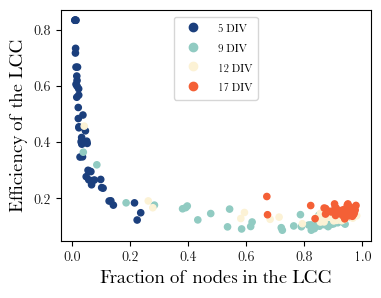

In [30]:
# Extracting columns for the selected measures
x = measures[:, important_measures_id[0]]
y = measures[:, important_measures_id[1]]
print('The two important measures for categorizing conditions based on the PCA1 and PCA2 are',str(measures_names[important_measures_id[0]]),str('and'), str(measures_names[important_measures_id[1]]))
# Creating a scatter plot
fig, ax = plt.subplots(figsize=(4,3))
scatter = ax.scatter(x, y, c=ids, s=20, cmap=cmap)  # You can replace 'viridis' with your preferred colormap

# Create a legend with unique numerical values
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in colors]
unique_ids = np.unique(ids)
legend_labels = [f'{id} DIV' for id in unique_ids]

# Extract handles from scatter.legend_elements()
handles, _ = scatter.legend_elements()
legend = plt.legend(handles=handles, labels=legend_labels, loc='upper center')

# Customize the legend title and labels
plt.setp(legend.get_title(), fontsize=10)
for text in legend.get_texts():
    text.set_fontsize(8)

# Set labels for the axes
plt.xlabel("PC 1", fontsize=14)
plt.ylabel("PC 2", fontsize=14)

# Setting labels for x and y axes
plt.xlabel(str(measures_names[important_measures_id[0]]))
plt.ylabel(str(measures_names[important_measures_id[1]]))
#plt.savefig('two_important_meas.svg')
plt.show()

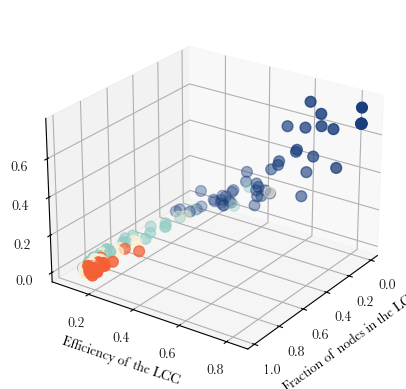

Fraction of nodes in the LCC Efficiency of the LCC Fraction of nodes in the periphery in the LCC


In [31]:
#use important measures to see the clustering
x = measures[:,important_measures_id[0]]
y = measures[:,important_measures_id[1]]
z = measures[:,important_measures_id[2]]
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x,y,z, c=ids,s=60,cmap=cmap)
plt.xlabel(str(measures_names[important_measures_id[0]]))
plt.ylabel(str(measures_names[important_measures_id[1]]))
ax.set_zlabel(str(measures_names[important_measures_id[2]]))
ax.view_init(25, 35)
plt.show()
print(str(measures_names[important_measures_id[0]]),str(measures_names[important_measures_id[1]]),
      str(measures_names[important_measures_id[2]]))

In [32]:
# Top 3 of important measures per principal component
for i in range(4):
    print('PC ' +str(i)+'\n')
    contribution = np.abs(pca.components_[i,:])
    important_measures_id = np.argsort(contribution)[::-1]
    for measure_id in important_measures_id[0:5]:
        print(measures_names[measure_id] + ' id ' + str(measure_id) + ': ' + str(contribution[measure_id]))
    print('\n')

PC 0

Fraction of nodes in the LCC id 4: 0.3618075812379866
Connected components entropy id 5: 0.3389058139175273
# of connected components id 2: 0.29467556756037094
Average clustering coefficient id 10: 0.28613899844074586
Average square clustering id 11: 0.28447582981861963


PC 1

Average communicability of the LCC id 17: 0.36582214827903864
Fraction of nodes in the periphery in the LCC id 7: 0.34160380977739535
Efficiency of the LCC id 1: 0.3310557998539191
Mean Assortativity coefficient of the LCC id 13: 0.30570020845385937
Fraction of nodes in the barycenter in the LCC id 8: 0.29901254947600736


PC 2

Average edge betweenness centrality id 20: 0.5296105403035096
# of communities id 3: 0.3813802479411773
Average clustering coefficient id 10: 0.3340005891934224
Average node betweenness centrality id 19: 0.3167778704294649
Average square clustering id 11: 0.30010406959016983


PC 3

# of communities id 3: 0.5127673835531127
Density id 0: 0.46811479193354083
Modularity id 12: 0.3281